In [1]:
import numpy as np 
from PIL import Image
from matplotlib import pyplot as plt 

# Δημιουργία συνάρτησης "setpixel"
def setpixel(x, y, colour, img):
    # Αυτή η συνάρτηση 'βάφει' το pixel στις συντεταγμένες (x,y) με το χρώμα 'colour'. 
    # To 'colour' πρέπει να είναι κάποιος ακέραιος στο 0..255 .
    # img είναι ο πίνακας που αντιστοιχεί στην ψηφιογραφική εικόνα (raster image) που θέλουμε να επεξεργαστούμε.
    imagedimensions = img.shape
    x1 = x + imagedimensions[1] // 2
    y1 = -y + imagedimensions[0] // 2
    if(y1 < 0 or y1 >= imagedimensions[0]):
        return(img)
    if(x1 < 0 or x1 >= imagedimensions[1]):
        return(img)
    img[y1, x1] = colour
    return(img)

def draw_line_bresenham(x1, y1, xn, yn, colour, img):
    # Ποιός είναι ο άξονας ταχύτερης κίνησης;
    if(np.abs(yn-y1) > np.abs(xn-x1)):
        fastest_is_y = True
    else:
        fastest_is_y = False
    if(fastest_is_y):
        x1, xn, y1, yn = y1, yn, x1, xn
    # Είναι x1 < xn;
    if(x1 > xn):
        # Τότε πρέπει να ανταλλάξω το αρχικό με το τελικό σημείο
        x1, xn, y1, yn = xn, x1, yn, y1
    dx = xn - x1
    dy = yn - y1
    error = -dx // 2
    y = y1
    # Ο άλλος άξονας αυξάνεται ή μειώνεται;
    if(y1 < yn):
        ystep = 1
    else:
        ystep = -1
    ##########################
    ## Άρχισε σχεδίαση
    ##########################
    for x in range(x1,xn+1):
        if(fastest_is_y):
            img = setpixel(y,x,colour,img)
        else:
            img = setpixel(x,y,colour,img)
        error = error + np.abs(dy)
        if(error >= 0):
            y = y + ystep
            error = error - dx
    return(img)    

In [2]:
def draw_triangle(X, colour, framebuffer):
    # H είσοδος μου είναι πίνακας X,
    # με πρώτη στήλη τις συντεταγμένες του 1ου σημείου,
    # δεύτερη στήλη τις συντεταγμένες του 2ου σημείου,
    # τρίτη στήλη τις συντεταγμένες του 3ου σημείου.
    p1 = X[:, 0]
    p2 = X[:, 1]
    p3 = X[:, 2]
    framebuffer = draw_line_bresenham(p1[0], p1[1], p2[0], p2[1], colour, framebuffer)
    framebuffer = draw_line_bresenham(p2[0], p2[1], p3[0], p3[1], colour, framebuffer)
    framebuffer = draw_line_bresenham(p3[0], p3[1], p1[0], p1[1], colour, framebuffer)
    return(framebuffer)

# Μία συνάρτηση που παίρνει όρισμα σειρά από κορυφές και σχεδιάζει αντίστοιχο πολύγωνο.
def draw_polygon():
    pass

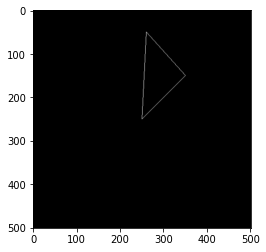

In [3]:
trianglepoints = np.array([
    [0, 100, 10],
    [0, 100, 200],
    [1, 1,   1],    # Είναι οι '1' των ομογενών συντεταγμένων
])

framebuffer = np.zeros([501, 501])
framebuffer = draw_triangle(trianglepoints, 200, framebuffer)
plt.imshow(framebuffer, cmap='gray', interpolation='bilinear')
plt.show()

[[ -50   50  -40]
 [-100    0  100]
 [   1    1    1]]


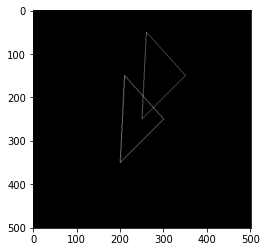

In [10]:
# Θα εφαρμόσω γεωμετρικό μετασχηματισμό στα σημεία που ορίζουν το τρίγωνο μου.
dx = -50
dy = -100
T_metafora = np.array([
    [1, 0, dx],
    [0, 1, dy],
    [0, 0,  1],
])
# Αρκεί να πολλαπλασιάσω τον πίνακα που κρατάει τα σημεία μου από αριστερά με τον πίνακα που περιγράφει τον μετασχηματισμό.
# Στην python αυτό το κάνουμε με τον τελεστή '@'
transformedpoints = T_metafora @ trianglepoints
print(transformedpoints)
framebuffer = np.zeros([501, 501])
framebuffer = draw_triangle(trianglepoints, 190, framebuffer)
framebuffer = draw_triangle(transformedpoints, 255, framebuffer)
plt.imshow(framebuffer, cmap='gray', interpolation='bilinear')
plt.show()

[[  0 200  20]
 [  0 200 400]
 [  1   1   1]]


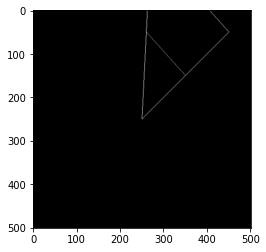

In [13]:
sx = 2.
sy = 2.
T_klimakosi = np.array([
    [sx, 0, 0],
    [0, sy, 0],
    [0, 0,  1],
])
# Αρκεί να πολλαπλασιάσω τον πίνακα που κρατάει τα σημεία μου από αριστερά με τον πίνακα που περιγράφει τον μετασχηματισμό.
# Στην python αυτό το κάνουμε με τον τελεστή '@'
transformedpoints = np.int32(np.round(T_klimakosi @ trianglepoints))
print(transformedpoints)
framebuffer = np.zeros([501, 501])
framebuffer = draw_triangle(trianglepoints, 190, framebuffer)
framebuffer = draw_triangle(transformedpoints, 255, framebuffer)
plt.imshow(framebuffer, cmap='gray', interpolation='bilinear')
plt.show()

[[-100  100  -80]
 [-200    0  200]
 [   1    1    1]]
[[ -50  150  -30]
 [-100  100  300]
 [   1    1    1]]


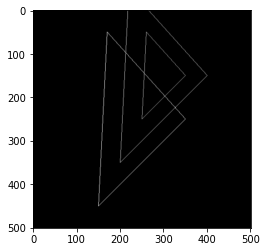

In [15]:
T_synthesi_1 = T_klimakosi @ T_metafora  # Μεταφορά και μετά κλιμάκωση
T_synthesi_2 = T_metafora @ T_klimakosi  # Κλιμάκωση και μετά μεταφορά
transformedpoints = np.int32(np.round(T_synthesi_1 @ trianglepoints))
print(transformedpoints)
framebuffer = np.zeros([501, 501])
framebuffer = draw_triangle(trianglepoints, 190, framebuffer)
framebuffer = draw_triangle(transformedpoints, 255, framebuffer)
transformedpoints = np.int32(np.round(T_synthesi_2 @ trianglepoints))
print(transformedpoints)
framebuffer = draw_triangle(transformedpoints, 210, framebuffer)
plt.imshow(framebuffer, cmap='gray', interpolation='bilinear')
plt.show()
# Το αποτέλεσμα της μίας σύνθεσης είναι διαφορετικό από το άλλο!
# (Ο πολλαπλασιασμός πινάκων είναι μη-αντιμεταθετικός, ΑΒ όχι ίσο με ΒΑ γενικά)

[[   0 -100 -200]
 [   0  100   10]
 [   1    1    1]]


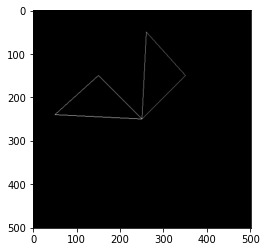

In [16]:
theta = np.pi / 2  # pi/2 ακτίνια = 90 μοίρες
T_peristrofi = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta),  np.cos(theta), 0],
    [0,    0,  1],
])
# Αρκεί να πολλαπλασιάσω τον πίνακα που κρατάει τα σημεία μου από αριστερά με τον πίνακα που περιγράφει τον μετασχηματισμό.
# Στην python αυτό το κάνουμε με τον τελεστή '@'
transformedpoints = np.int32(np.round(T_peristrofi @ trianglepoints))
print(transformedpoints)
framebuffer = np.zeros([501, 501])
framebuffer = draw_triangle(trianglepoints, 190, framebuffer)
framebuffer = draw_triangle(transformedpoints, 255, framebuffer)
plt.imshow(framebuffer, cmap='gray', interpolation='bilinear')
plt.show()

[[  0 140 126]
 [  0  22 156]
 [  1   1   1]]


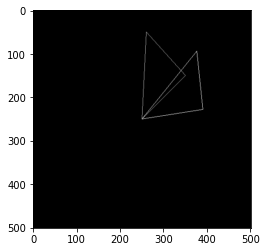

[[  0 126 193]
 [  0 -64  52]
 [  1   1   1]]


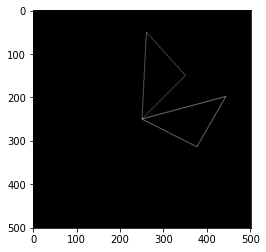

[[   0   64  187]
 [   0 -126  -71]
 [   1    1    1]]


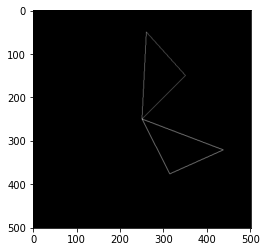

[[   0  -22  109]
 [   0 -140 -168]
 [   1    1    1]]


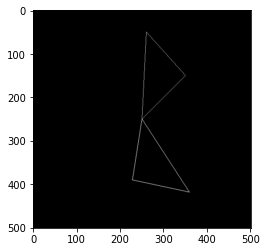

[[   0 -100  -10]
 [   0 -100 -200]
 [   1    1    1]]


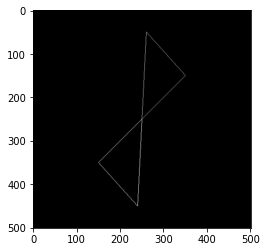

[[   0 -140 -126]
 [   0  -22 -156]
 [   1    1    1]]


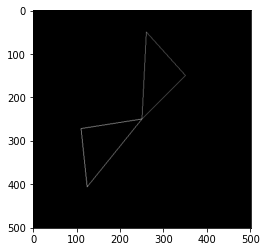

[[   0 -126 -193]
 [   0   64  -52]
 [   1    1    1]]


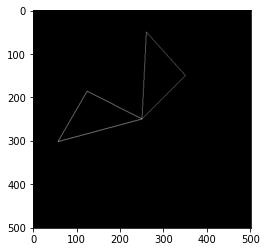

[[   0  -64 -187]
 [   0  126   71]
 [   1    1    1]]


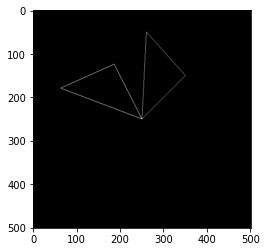

[[   0   22 -109]
 [   0  140  168]
 [   1    1    1]]


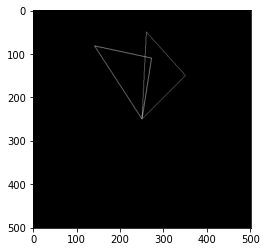

[[  0 100  10]
 [  0 100 200]
 [  1   1   1]]


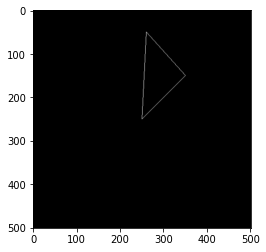

In [21]:
k = 10
T_peristrofi = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
])
theta = 2*np.pi / k  # Η γωνία περιστροφής κάθε φορά θα είναι 360 μοίρες / k
for i in range(k):
    #T_peristrofi = T_peristrofi @ np.array([
    #    [np.cos(theta), -np.sin(theta), 0],
    #    [np.sin(theta),  np.cos(theta), 0],
    #    [0,    0,  1],
    #])
    ###
    # Πολλαλασιάζοντας με τον αντίστροφο πίνακα, εκτελώ τον 'αντίστροφο' μετασχηματισμό
    T_peristrofi = T_peristrofi @ np.linalg.inv(np.array([   # τώρα πολλαπλασιάζω με τον αντίστροφο πίνακα
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0,    0,  1],
    ]))
    ###
    # Αρκεί να πολλαπλασιάσω τον πίνακα που κρατάει τα σημεία μου από αριστερά με τον πίνακα που περιγράφει τον μετασχηματισμό.
    # Στην python αυτό το κάνουμε με τον τελεστή '@'
    transformedpoints = np.int32(np.round(T_peristrofi @ trianglepoints))
    print(transformedpoints)
    framebuffer = np.zeros([501, 501])
    framebuffer = draw_triangle(trianglepoints, 190, framebuffer)
    framebuffer = draw_triangle(transformedpoints, 255, framebuffer)
    plt.imshow(framebuffer, cmap='gray', interpolation='bilinear')
    plt.show()